In [238]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyhessio
from ctapipe import io, visualization
import numpy as np
from ctapipe.utils.datasets import get_example_simtelarray_file
import astropy.units as u
from ipywidgets import interact

In [239]:
src=io.hessio.hessio_event_source("/home/trichard/Documents/CTA/CTAsoft/ctapipe/ctapipe-extra/datasets/gamma_test.simtel.gz")


evt=next(src)
evt=next(src)


evt=next(src)
evt=next(src)

evt=next(src)

evt=next(src)

evt=next(src)

evt=next(src)


print(evt.mc.energy.value)

tels=list(evt.dl0.tels_with_data)
tels


0.02509460598230362


[1, 3, 4]

ValueError: Image has a different shape (1855, 30) than thegiven CameraGeometry (1855,)

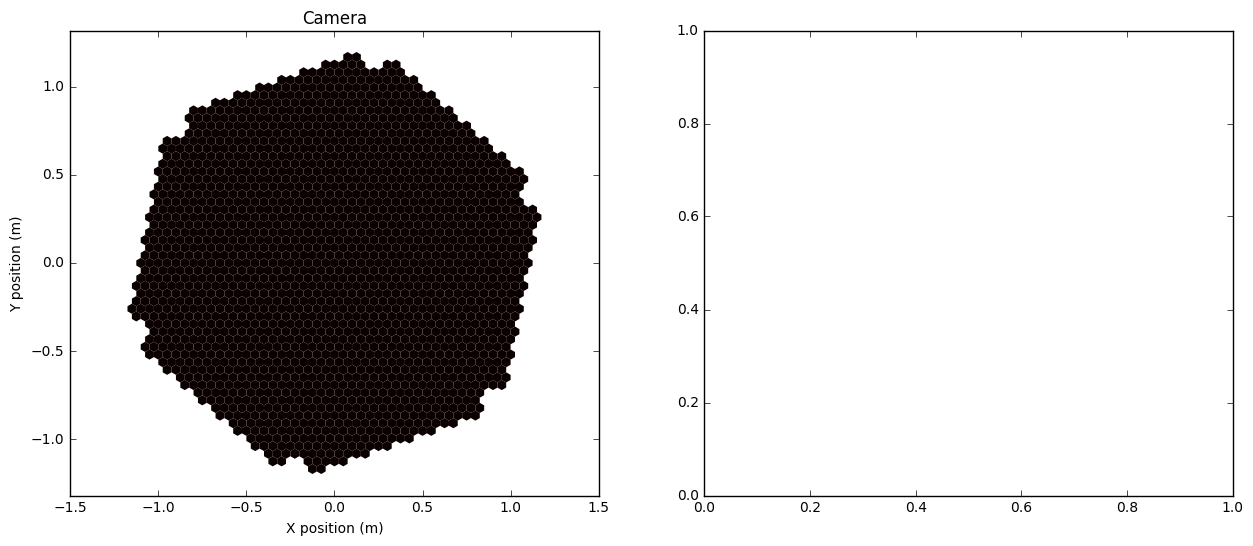

In [252]:
def plot_event(t,tel):
    
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,6))
    cube=evt.dl0.tel[tels[tel]].adc_samples[0]
    x, y = evt.meta.pixel_pos[tels[tel]]
    geom = io.CameraGeometry.guess(x, y, 2.3*u.meter)
    disp = visualization.CameraDisplay(geom,ax=ax1)
    disp.image = cube[:,t]
    disp.add_colorbar()
    disp.update()
    print(type(disp.image))
    ax2.plot( np.sum(cube,axis=0) )
    ax2.axvline(t,ls=':',color='k')
    ax2.set_ylabel('Summed ADC')    
    ax2.set_xlabel('Time slice')
    plt.show()

            
plot_event(8,1)

In [241]:
from ctapipe.reco import hillas
from ctapipe.reco import MonoReco
from ctapipe.reco import cleaning

[1, 3, 4]


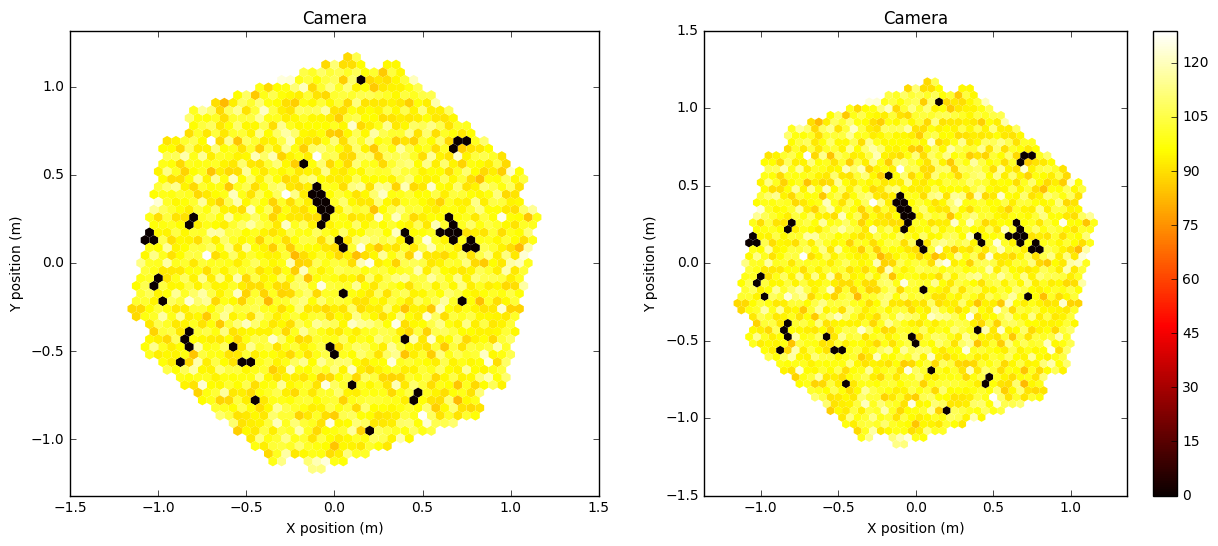

In [251]:
h=hillas
print(tels)
x, y = evt.meta.pixel_pos[tels[0]]
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,6))
geom = io.CameraGeometry.guess(x, y, 2.3*u.meter)
geom2 = io.CameraGeometry.guess(x, y, 2.3*u.meter)
disp = visualization.CameraDisplay(geom,ax=ax1)
cube=evt.dl0.tel[tels[0]].adc_samples[0]
cube2=evt.dl0.tel[tels[0]].adc_samples[0]
disp.image = cube[:,8]
#disp.update()
disp.add_colorbar()


dispclean= visualization.CameraDisplay(geom2,ax=ax2)
dispclean.image=cube2[:,8]
mask = cleaning.tailcuts_clean(geom,dispclean.image,np.ones(x.size),130,120)
dispclean.image[mask]=0
#dispclean.update()

In [225]:
h.hillas_parameters_1(x,y,disp.image)

(MomentParameters(size=175427.0, cen_x=-0.0020944608874603758, cen_y=9.6502841309593719e-06, length=0.56844837437252449, width=0.56737089688545861, r=0.002094483119312522, phi=3.1369851596518492, psi=0.32608515311627206, miss=0.0019809991420045524),
 HighOrderMomentParameters(Skewness=0.00052271071957853794, Kurtosis=1.9959295190263748, Asymmetry=0.045790792968725916))

In [34]:
print(h.MomentParameters)

<class 'ctapipe.reco.hillas.MomentParameters'>


In [42]:
hmono= MonoReco

In [43]:
hmono.disp_value(h.MomentParameters)

TypeError: unsupported operand type(s) for /: 'property' and 'property'

In [53]:
a =h.MomentParameters.width
print(a)